In [16]:
import os
import sys
from pathlib import Path

ASL = os.path.join(str(Path.home()), "ASL")
src = os.path.join(str(Path.home()), "ASL", "src")
os.chdir( ASL )
sys.path.append(ASL)
sys.path.append(src)
import imageio



In [36]:
img = imageio.imread( "/home/jonfrey/Datasets/scannet/scans/scene0000_00/color/10.jpg" )
im = pil.fromarray(img[k:-k:2,k:-k:2])
im.save("docs/color_scene_0000_00_f0.png")

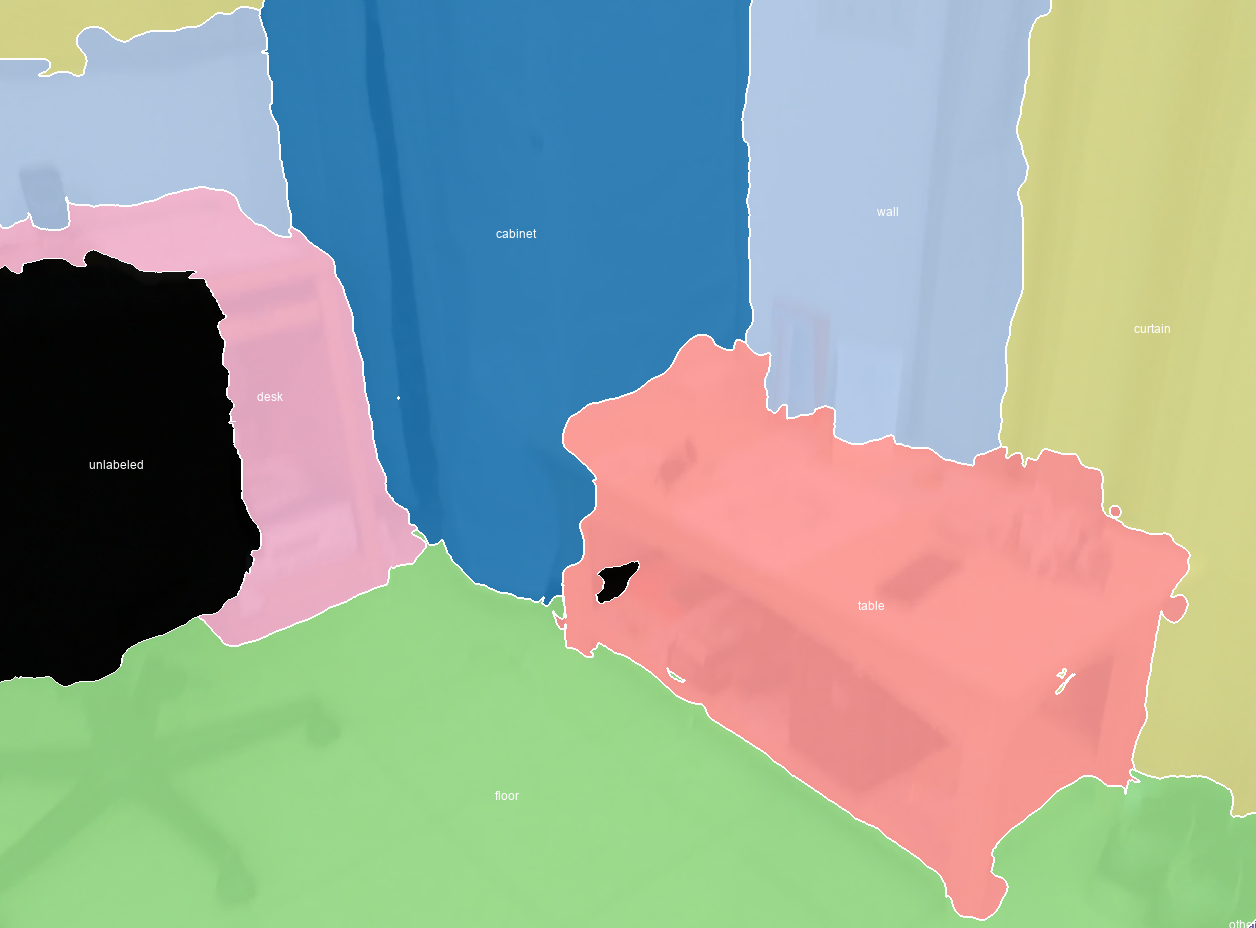

In [35]:
from visu import Visualizer

vi = Visualizer(p_visu="test")
from utils_asl import LabelLoaderAuto
lla = LabelLoaderAuto(root_scannet="/home/jonfrey/Datasets/scannet")
la = lla.get("/home/jonfrey/Datasets/scannet/scans/scene0000_00/label-filt/10.png")[0]
res = vi.plot_detectron( np.array(im), la[k:-k,k:-k], alpha= 0.9, jupyter=True)
im = pil.fromarray(res)
im.save("docs/label_scene_0000_00_f0.png")

In [23]:
import numpy as np
import PIL.Image as pil
import matplotlib as mpl
import matplotlib.cm as cm
import cv2
img = imageio.imread( "/home/jonfrey/Datasets/scannet/scans/scene0000_00/depth/10.png" )
k = 20
img = img[k:-k,k:-k]
vmax = np.percentile(img, 95)

mi = img[img>10].min()
normalizer = mpl.colors.Normalize(vmin=mi, vmax=vmax)
mapper = cm.ScalarMappable(norm=normalizer, cmap='magma_r')
colormapped_im = (mapper.to_rgba(img)[:, :, :3] * 255).astype(np.uint8)

colormapped_im[img<20,:] = 0
im = pil.fromarray(colormapped_im)
im
im.save("docs/depth_map_scene_0000_00_f0.png")